<a href="https://colab.research.google.com/github/UERJ-FISICA/Fisica-Geral/blob/main/Ajuste_Pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Tabela de dados

In [4]:
!curl -o dados-pendulo-FG-2020-2.xlsx https://github.com/UERJ-FISICA/Fisica-Geral/raw/main/dados/dados-pendulo-FG-2020-2.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   164  100   164    0     0   1726      0 --:--:-- --:--:-- --:--:--  1726


In [5]:
!ls

dados-pendulo-FG-2020-2.xlsx  sample_data


In [ ]:
df__ = pd.read_excel( "dados-pendulo-FG-2020-2.xlsx", sheet_name="Dados", usecols=range(1,7), header=None, skiprows=[1], names=[ "L1", "L2", "L3", "L4", "L5", "L6" ], nrows=11 )
arr_comprimento = df__.iloc[ 0 ]
df_periodo = df__.iloc[ 1 : ]

In [ ]:
arr_comprimento

L1    32.0
L2    41.5
L3    50.0
L4    59.5
L5    68.3
L6    77.3
Name: 0, dtype: float64

In [ ]:
df_periodo

,L1,L2,L3,L4,L5,L6
1,23.52,26.63,29.32,31.62,33.74,36.01
2,23.41,26.63,29.26,31.52,33.78,35.26
3,23.65,26.63,29.20,31.70,33.20,35.22
4,23.36,26.60,29.19,31.55,33.79,35.75
5,23.46,26.52,29.32,31.75,33.62,35.35
6,23.61,26.44,29.25,31.63,33.73,35.65
7,23.50,26.63,29.15,31.53,33.71,35.49
8,23.57,26.50,29.05,31.56,33.62,35.33
9,23.61,26.48,29.12,31.47,33.82,35.80
10,23.56,26.51,29.13,31.42,33.70,35.72


In [ ]:
Numero_periodos = 20 
arr_periodo = df_periodo.mean( axis=0 )
arr_periodo = arr_periodo / Numero_periodos
arr_periodo

L1    1.17625
L2    1.32785
L3    1.45995
L4    1.57875
L5    1.68355
L6    1.77790
dtype: float64

In [ ]:
arr_X = ( arr_periodo / ( 2. * np.pi ) ) ** 2
arr_X

L1    0.035046
L2    0.044662
L3    0.053990
L4    0.063135
L5    0.071795
L6    0.080067
dtype: float64

### Cálculo de parâmetros

In [ ]:
N_medidas = arr_X.size
print ( "Número de medidas: {}".format( N_medidas ) )

Número de medidas: 6


In [ ]:
media_X = arr_X.mean()
media_X2 = ( arr_X ** 2 ).mean()
var_X_populacional = ( arr_X ** 2 ).mean() - ( media_X ** 2 )
dp_X_populacional = np.sqrt( var_X_populacional )
print ( "Média (s²): {}".format( media_X ) )
print ( "Média quadrados(s^4): {}".format( media_X2 ) )
print ( "Variância (s^4): {}".format( var_X_populacional ) )
print ( "Desvio padrão (s²): {}".format( dp_X_populacional ) )

Média (s²): 0.058115822508636485
Média quadrados(s^4): 0.0036148490175893482
Variância (s^4): 0.00023740019173400934
Desvio padrão (s²): 0.015407796459390595


In [ ]:
media_comprimento = arr_comprimento.mean()
var_comprimento_populacional = ( arr_comprimento ** 2 ).mean() - ( media_comprimento ** 2 )
dp_comprimento_populacional = np.sqrt( var_comprimento_populacional )
print ( "Média (cm): {}".format( media_comprimento ) )
print ( "Variância (cm²): {}".format( var_comprimento_populacional ) )
print ( "Desvio padrão (cm): {}".format( dp_comprimento_populacional ) )

Média (cm): 54.76666666666667
Variância (cm²): 238.3922222222218
Desvio padrão (cm): 15.439955382779504


In [ ]:
media_X_comprimento = ( arr_X * arr_comprimento ).mean()
cov_populacional = media_X_comprimento - ( media_X * media_comprimento )
coeficiente_correlacao = cov_populacional / ( dp_X_populacional * dp_comprimento_populacional )
print ( "Covariância (s² × cm): {}".format( cov_populacional ) )
print ( "Coeficiente de correlação: {}".format( coeficiente_correlacao ) )

Covariância (s² × cm): 0.23781460287521616
Coeficiente de correlação: 0.9996591489120146


### Cálculo dos coeficientes

In [ ]:
coeficiente_a = cov_populacional / var_X_populacional
print ( "Coeficiente a (cm/s²): {}".format( coeficiente_a ) )
coeficiente_a_m_s2 = coeficiente_a * 1e-02
print ( "Coeficiente a (m/s²): {}".format( coeficiente_a_m_s2 ) )

Coeficiente a (cm/s²): 1001.7456226053564
Coeficiente a (m/s²): 10.017456226053564


In [ ]:
coeficiente_b = media_comprimento - coeficiente_a * media_X # cm
print ( "Coeficiente b (cm): {}".format( coeficiente_b ) )

Coeficiente b (cm): -3.450604135469767


### Cálculo das incertezas

In [ ]:
arr_desvios_ajuste = ( arr_comprimento - ( coeficiente_a * arr_X + coeficiente_b ) )
arr_desvios_ajuste

L1    0.343340
L2    0.210628
L3   -0.634003
L4   -0.294141
L5   -0.169408
L6    0.543585
dtype: float64

In [ ]:
print ( arr_desvios_ajuste ** 2 )
print ( "Soma quadrado desvios (cm): {}".format( ( arr_desvios_ajuste ** 2 ).sum() ) )

L1    0.117882
L2    0.044364
L3    0.401960
L4    0.086519
L5    0.028699
L6    0.295485
dtype: float64
Soma quadrado desvios (cm): 0.9749088020524186


In [ ]:
ep_y_1 = np.sqrt( ( arr_desvios_ajuste ** 2 ).sum() / ( N_medidas - 2 ) )
print ( "epsilon_y = {}".format( ep_y_1 ) )

epsilon_y = 0.49368735097539684


In [ ]:
ep_y_2 = dp_comprimento_populacional * np.sqrt( ( N_medidas / ( N_medidas - 2 ) ) * ( 1. - coeficiente_correlacao ** 2 ) )
print ( "epsilon_y = {}".format( ep_y_2 ) )

epsilon_y = 0.49368735097647354


In [ ]:
ep_y = ep_y_2
sigma_a = ep_y / ( dp_X_populacional * np.sqrt( N_medidas ) )
sigma_a_m_s2 = sigma_a * 1e-02
print ( "Incerteza padrão coeficiente a (cm/s²): {}".format( sigma_a ) )
print ( "Incerteza padrão coeficiente a (m/s²): {}".format( sigma_a_m_s2 ) )

Incerteza padrão coeficiente a (cm/s²): 13.080846283956559
Incerteza padrão coeficiente a (m/s²): 0.1308084628395656


In [ ]:
sigma_b = sigma_a * np.sqrt( media_X2 )
print ( "Incerteza padrão coeficiente b (cm): {}".format( sigma_b ) )

Incerteza padrão coeficiente b (cm): 0.7864677589888796


### Estimativas para os coeficientes

In [ ]:
print ( "a = {:.0f} ± {:.0f} (cm/s²)".format( np.round( coeficiente_a, 0 ), np.round( sigma_a, 0 ) ) )
print ( "a = {} ± {} (m/s²)".format( np.round( coeficiente_a_m_s2, 2 ), np.round( sigma_a_m_s2, 2 ) ) )

a = 1002 ± 13 (cm/s²)
a = 10.02 ± 0.13 (m/s²)


In [ ]:
print ( "b = {} ± {} (cm)".format( np.round( coeficiente_b, 1 ), np.round( sigma_b, 1 ) ) )

b = -3.5 ± 0.8 (cm)


Text(0.1, 0.85, '$b = -3.5 \\pm 0.8\\,\\left(\\rm{cm}\\right)$')

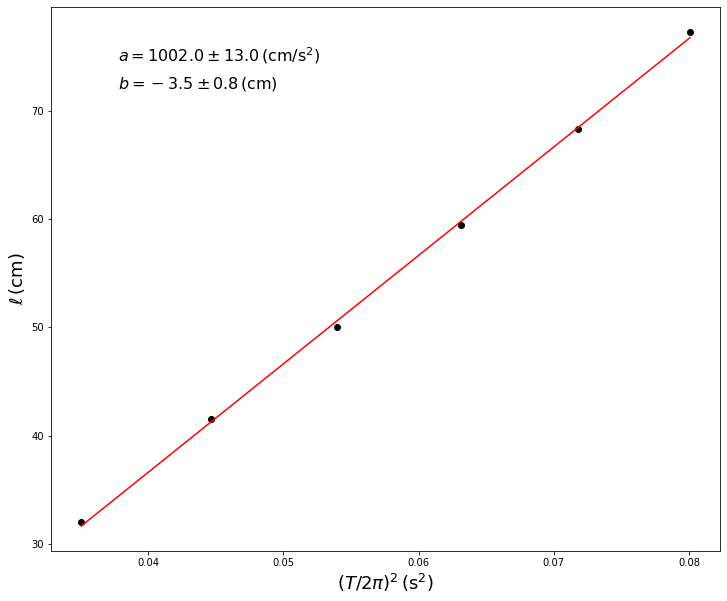

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.plot( arr_X, arr_comprimento, 'ko' )
plt.plot( arr_X, ( coeficiente_a * arr_X + coeficiente_b ), '-r' )
plt.xlabel( r"$\left(T/2\pi\right)^2\,\left(\rm{{s}}^2\right)$", fontsize=18)
plt.ylabel( r"$\ell\,\left(\rm{{cm}}\right)$", fontsize=18 )

plt.text( 0.1, 0.9,
          r"$a = {} \pm {}\,\left(\rm{{cm}}/\rm{{s}}^2\right)$".format( np.round( coeficiente_a, 0 ), np.round( sigma_a, 0 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.1, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( coeficiente_b, 1 ), np.round( sigma_b, 1 ) ),
          fontsize=16, transform=plt.gca().transAxes )

Text(0.1, 0.85, '$b = -3.5 \\pm 0.8\\,\\left(\\rm{cm}\\right)$')

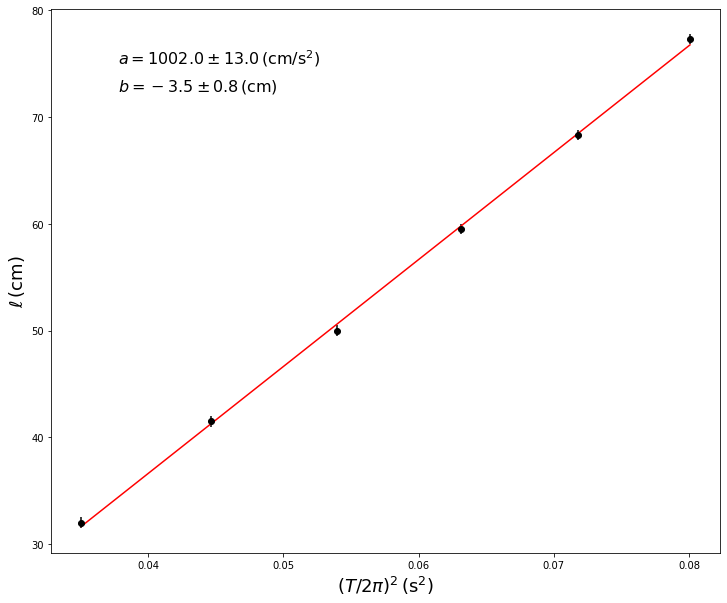

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.errorbar( arr_X, arr_comprimento, yerr=np.full_like( arr_comprimento, ep_y ), fmt='ko' )
plt.plot( arr_X, ( coeficiente_a * arr_X + coeficiente_b ), '-r' )
plt.xlabel( r"$\left(T/2\pi\right)^2\,\left(\rm{{s}}^2\right)$", fontsize=18)
plt.ylabel( r"$\ell\,\left(\rm{{cm}}\right)$", fontsize=18 )

plt.text( 0.1, 0.9,
          r"$a = {} \pm {}\,\left(\rm{{cm}}/\rm{{s}}^2\right)$".format( np.round( coeficiente_a, 0 ), np.round( sigma_a, 0 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.1, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( coeficiente_b, 1 ), np.round( sigma_b, 1 ) ),
          fontsize=16, transform=plt.gca().transAxes )

### Usando um pacote

In [ ]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x

popt_lin, pcov_lin = curve_fit( pol1, arr_X, arr_comprimento, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[  -3.45060399 1001.74562023] [[  0.61853163  -9.9441151 ]
 [ -9.9441151  171.10856622]]


In [ ]:
print ( "Coeficiente a (cm/s²): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente a (cm/s²): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.0f} ± {:.0f} (cm/s²)".format( np.round( popt_lin[ 1 ], 0 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 0 ) ) )

Coeficiente a (cm/s²): 1001.7456202266582
Incerteza padrão coeficiente a (cm/s²): 13.080847305065012
a = 1002 ± 13 (cm/s²)


In [ ]:
print ( "Coeficiente b (cm): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (cm): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (cm)".format( np.round( popt_lin[ 0 ], 1 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 1 ) ) )

Coeficiente b (cm): -3.4506039865815046
Incerteza padrão coeficiente b (cm): 0.7864678188561687
-3.5 ± 0.8 (cm)


Text(0.1, 0.85, '$b = -3.5 \\pm 0.8\\,\\left(\\rm{cm}\\right)$')

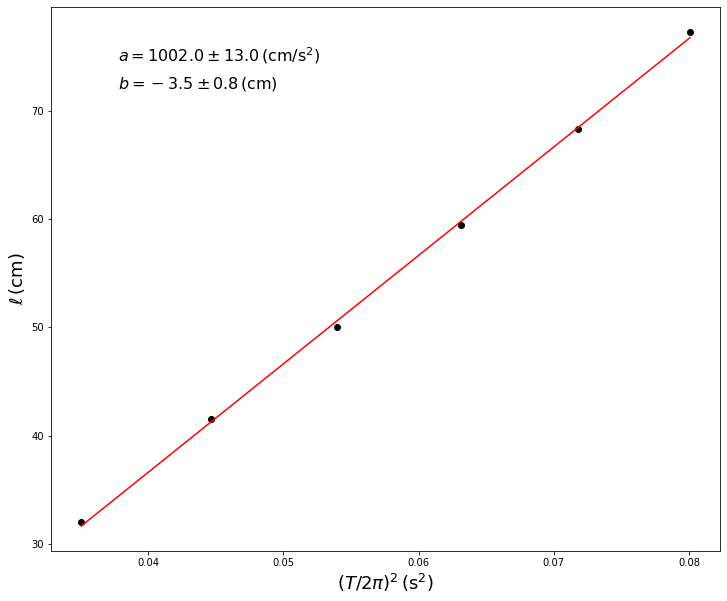

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.plot( arr_X, arr_comprimento, 'ko' )
plt.plot( arr_X, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * arr_X ), '-r' )
plt.xlabel( r"$\left(T/2\pi\right)^2\,\left(\rm{{s}}^2\right)$", fontsize=18)
plt.ylabel( r"$\ell\,\left(\rm{{cm}}\right)$", fontsize=18 )

plt.text( 0.1, 0.9,
          r"$a = {} \pm {}\,\left(\rm{{cm}}/\rm{{s}}^2\right)$".format( np.round( popt_lin[ 1 ], 0 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 0 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.1, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( popt_lin[ 0 ], 1 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 1 ) ),
          fontsize=16, transform=plt.gca().transAxes )